## Assignment-2

#### Reading the csv file: This Dataset contains the SMS content and corresponding labels ('ham' for regular messages and 'spam' for unsolicited messages), respectively

In [2]:
import pandas as pd
file = r"C:\Users\pinis\Downloads\spam_sms.csv"
df = pd.read_csv(file)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)#renaming the column names
df.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#### Columns- displays the names of columns in the DataFrame

In [3]:
df.columns

Index(['label', 'text'], dtype='object')

#### dtypes- returns the data types of columns in the DataFrame

In [4]:
df.dtypes

label    object
text     object
dtype: object

#### info() menthod prints the overview of the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### describe() method prints statistical data of the DataFrame

In [6]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Creating a new column 'length' in DataFrame and assigning it the length of each string of the 'text' column

In [7]:
df['length'] = df['text'].str.len()
df.describe() #calculates statistical data of the dataframe

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


#### Gives an overview of the data in the dataframe which includes the most common values and their frequencies.

In [8]:
df.describe(include='O')

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Below line of code gives the count of missing values for each column in the dataframe

In [9]:
df.isna().sum()

label     0
text      0
length    0
dtype: int64

#### Converting the values in the 'label' and 'text' columns of the DataFrame to uppercase using the upper() method

In [10]:
df['label'] = df['label'].str.upper()
df['text'] = df['text'].str.upper()
df.head(10)#displaying first 10 rows of the DataFrame

,label,text,length
0,HAM,"GO UNTIL JURONG POINT, CRAZY.. AVAILABLE ONLY ...",111
1,HAM,OK LAR... JOKING WIF U ONI...,29
2,SPAM,FREE ENTRY IN 2 A WKLY COMP TO WIN FA CUP FINA...,155
3,HAM,U DUN SAY SO EARLY HOR... U C ALREADY THEN SAY...,49
4,HAM,"NAH I DON'T THINK HE GOES TO USF, HE LIVES ARO...",61
5,SPAM,FREEMSG HEY THERE DARLING IT'S BEEN 3 WEEK'S N...,148
6,HAM,EVEN MY BROTHER IS NOT LIKE TO SPEAK WITH ME. ...,77
7,HAM,AS PER YOUR REQUEST 'MELLE MELLE (ORU MINNAMIN...,160
8,SPAM,WINNER!! AS A VALUED NETWORK CUSTOMER YOU HAVE...,158
9,SPAM,HAD YOUR MOBILE 11 MONTHS OR MORE? U R ENTITLE...,154


#### Filtering DataFrame to find rows where the 'label' column contains the string 'SPAM'

In [11]:
df[df['label'].str.contains('SPAM')]

,label,text,length
2,SPAM,FREE ENTRY IN 2 A WKLY COMP TO WIN FA CUP FINA...,155
5,SPAM,FREEMSG HEY THERE DARLING IT'S BEEN 3 WEEK'S N...,148
8,SPAM,WINNER!! AS A VALUED NETWORK CUSTOMER YOU HAVE...,158
9,SPAM,HAD YOUR MOBILE 11 MONTHS OR MORE? U R ENTITLE...,154
11,SPAM,"SIX CHANCES TO WIN CASH! FROM 100 TO 20,000 PO...",136
...,...,...,...
5537,SPAM,WANT EXPLICIT SEX IN 30 SECS? RING 02073162414...,90
5540,SPAM,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160
5547,SPAM,HAD YOUR CONTRACT MOBILE 11 MNTHS? LATEST MOTO...,160
5566,SPAM,REMINDER FROM O2: TO GET 2.50 POUNDS FREE CALL...,147


#### Plotting line plot for the 'length' column

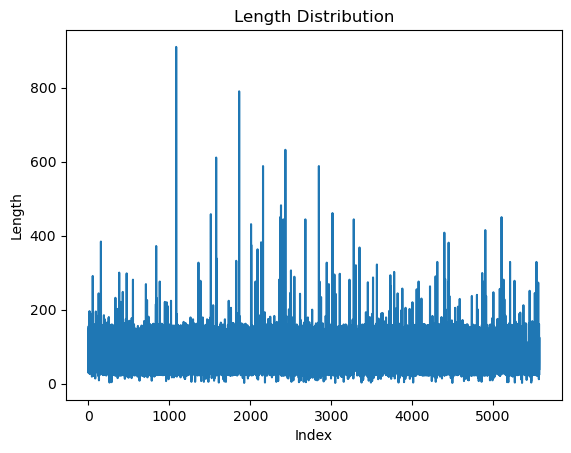

In [12]:
import matplotlib.pyplot as plt
df['length'].plot()
plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Length Distribution')
plt.show()

#### Plotting horizontal box plot of the 'length' column

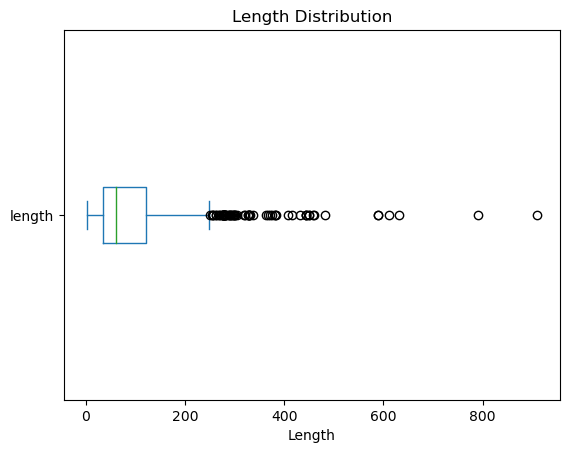

In [13]:
df['length'].plot(kind='box', vert=False)
plt.xlabel('Length')
plt.title('Length Distribution')
plt.show()

#### Plotting histogram of the 'length' column with 30 bins

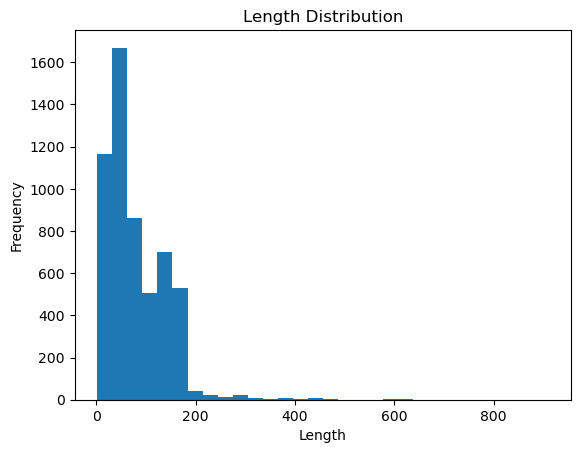

In [14]:
df['length'].plot(kind='hist', bins=30)
plt.xlabel('Length')
plt.title('Length Distribution')
plt.show()

#### Generating a box plot showing the distribution of 'length' for each label ('HAM', 'SPAM')

C:\Users\pinis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


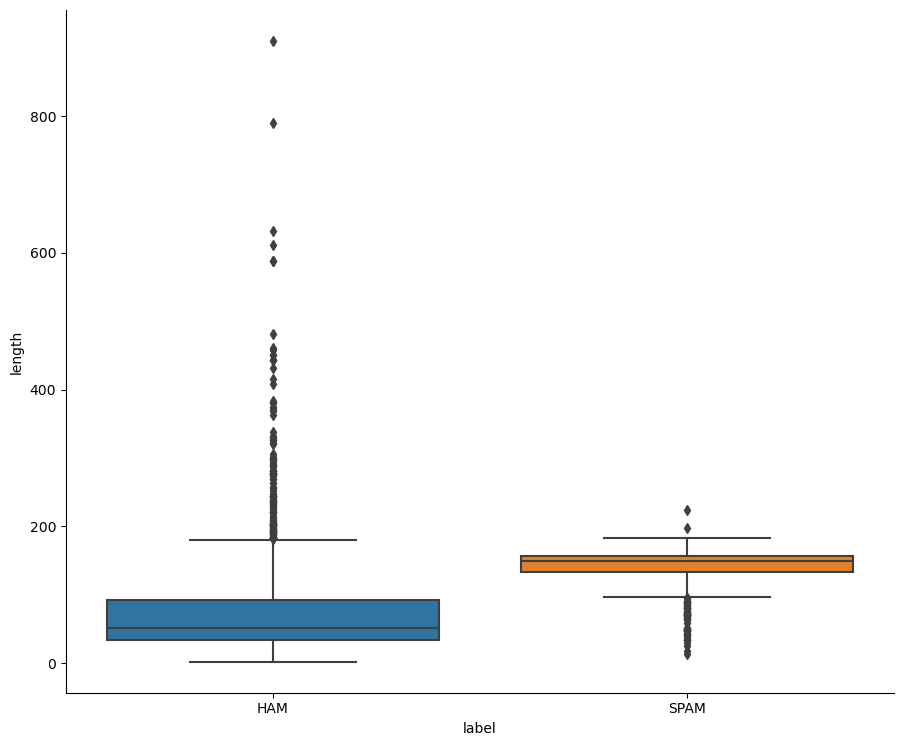

In [15]:
import seaborn as sns 
where = df['label'].isin(['HAM', 'SPAM'])
g = sns.catplot(data=df[where], x="label", y="length", kind='box')
g.fig.set_size_inches(10, 8) 


#### Extracts words from a given text while considering hyphens and ignoring non-alphanumeric characters

In [16]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
 
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


#### Importing natural language tool kit package and displaying the stop words

In [17]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'these', 'such', "don't", "shan't", 'have', 'by', 'further', 'isn', 've', 're', 'wouldn', 'whom', "didn't", 'very', 'him', 'up', 'all', 'against', 'off', "mustn't", 'few', 'are', 'over', 'after', 'hadn', 'wasn', 'am', 'won', 'haven', 'below', "couldn't", 'm', 'we', 'theirs', 'themselves', 'mightn', 'our', 'with', 'during', 'both', 'ma', 'they', 'ourselves', 'me', "won't", "you'd", 'he', 'yourselves', 'ours', 'it', 'into', 'hers', 'so', 'how', 'll', 'of', 'where', "it's", 'more', 'their', 'has', 'if', 'i', 'which', 'herself', 'between', 'an', 'for', 'is', 'do', "weren't", "needn't", 'her', 'couldn', "you've", 'while', 'when', 'here', 'in', "shouldn't", 'on', "you'll", 'didn', 'hasn', 'once', 'then', 'be', "that'll", 'she', "isn't", 'again', 'some', 'weren', 'you', 'what', 'shouldn', 'nor', 'this', 'doesn', 'y', 'does', 'mustn', 'but', 'same', 'o', 'from', 'only', 'under', 'why', 'those', 'a', 'not', 'yours', 't', 'that', "you're", 'to', "wasn't", "haven't", 'just', 'myself', 'its', 'at

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Testing the function

In [18]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


#### The prepare function is to define pipeline that converts text to lowercase, tokenizes it, and removes stopwords

In [19]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

#### creates a new column 'tokens' in the DataFrame

In [20]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

#### Creates a new column 'num_tokens' which calculates the number of tokens for each text entry in the 'tokens' column

In [21]:
df['num_tokens'] = df['tokens'].map(len)
df.tail(10) #displays last 10 records of the DataFrame

,label,text,length,tokens,num_tokens
5562,HAM,OK LOR... SONY ERICSSON SALESMAN... I ASK SHUH...,96,"[ok, lor, sony, ericsson, salesman, ask, shuhu...",12
5563,HAM,ARD 6 LIKE DAT LOR.,19,"[ard, like, dat, lor]",4
5564,HAM,WHY DON'T YOU WAIT 'TIL AT LEAST WEDNESDAY TO ...,67,"[wait, til, least, wednesday, see, get]",6
5565,HAM,HUH Y LEI...,12,"[huh, lei]",2
5566,SPAM,REMINDER FROM O2: TO GET 2.50 POUNDS FREE CALL...,147,"[reminder, o2, get, pounds, free, call, credit...",17
5567,SPAM,THIS IS THE 2ND TIME WE HAVE TRIED 2 CONTACT U...,161,"[2nd, time, tried, contact, u, u, pound, prize...",16
5568,HAM,WILL Ì_ B GOING TO ESPLANADE FR HOME?,37,"[b, going, esplanade, fr, home]",5
5569,HAM,"PITY, * WAS IN MOOD FOR THAT. SO...ANY OTHER S...",57,"[pity, mood, suggestions]",3
5570,HAM,THE GUY DID SOME BITCHING BUT I ACTED LIKE I'D...,125,"[guy, bitching, acted, like, interested, buyin...",13
5571,HAM,ROFL. ITS TRUE TO ITS NAME,26,"[rofl, true, name]",3


#### Counts the frequency of tokens in the given text

In [22]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


#### Updating the token counts based on tokens from another text

In [23]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


#### Prints the most common 5 tokens and their frequencies across all entries in the 'tokens' column of the DataFrame

In [24]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))


[('u', 1177), ('call', 582), ('get', 389), ('ur', 385), ('gt', 318)]


#### Creating a DataFrame freq_df and filtering out tokens with a frequency of less than 1

In [25]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

#### Sorting the freq column in descending order

In [26]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
u,1177
call,582
get,389
ur,385
gt,318
lt,316
ok,292
go,280
free,279


#### Returns statistical data of the freq_df DataFrame

In [27]:
freq_df.describe()

,freq
count,8097.000000
mean,6.136470
std,23.552864
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,1177.000000


#### Creating a horizontal bar plot using the top 15 most frequent tokens from freq_df DataFrame¶

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

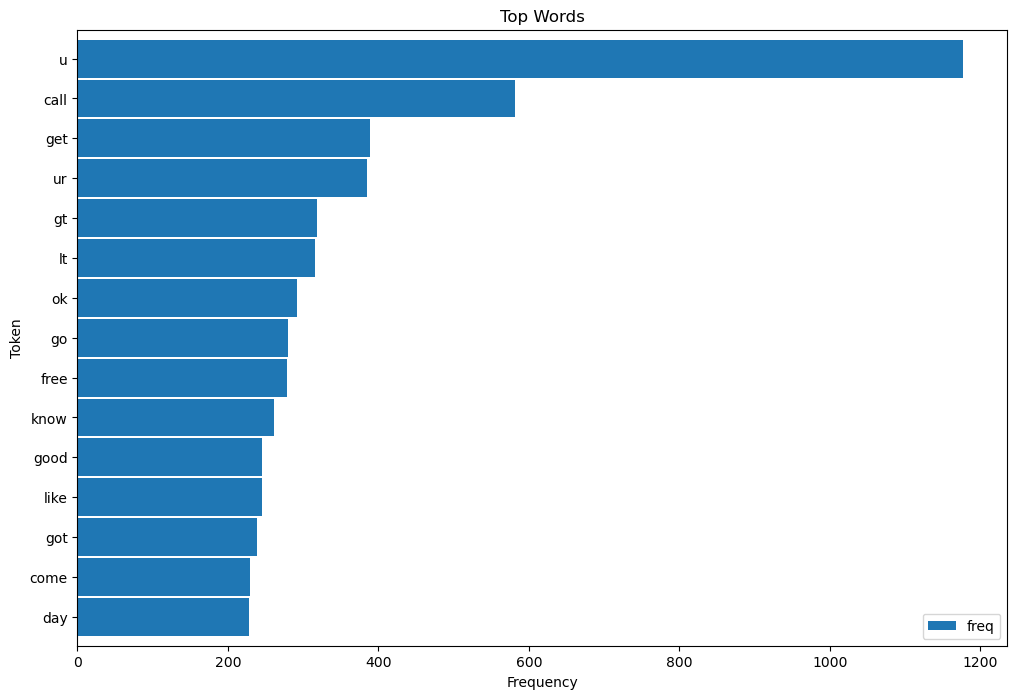

In [28]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [29]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


#### Visualization using the WordCloud library and matplotlib of the text data from the label column when string is spam, with a maximum of 100 words.

(-0.5, 399.5, 199.5, -0.5)

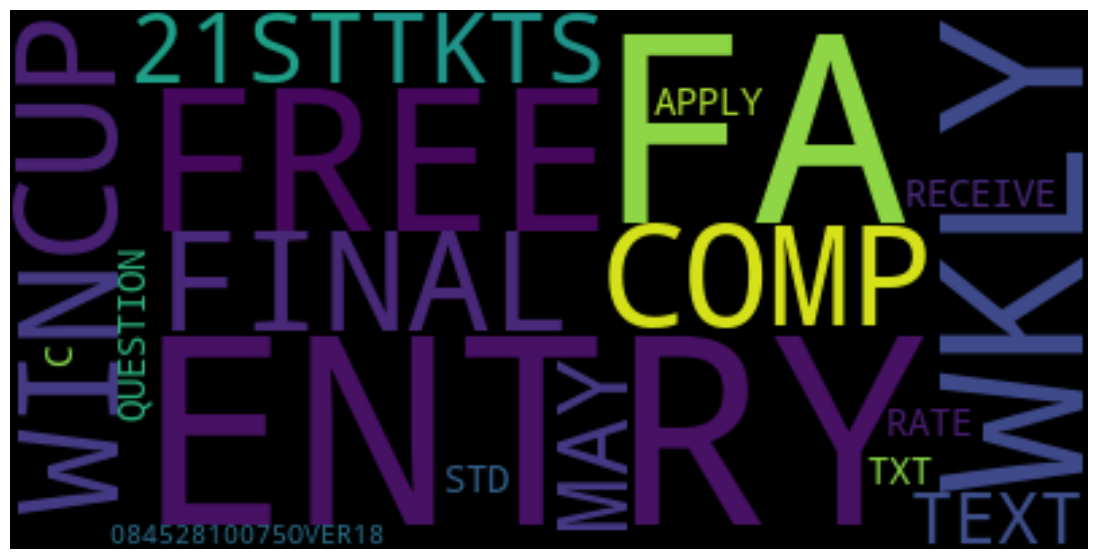

In [30]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("label=='SPAM'")['text'].values[0]
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")